In [2]:
#Create Environment
import pandas as pd
import numpy as np
import palettable
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import matplotlib.pyplot as plt
plt.rcParams["font.family"] = "arial" # if you don't have arial it will fall back to Deja Vu
plt.rcParams["font.size"] = "18"

import matplotlib

!pip install comut
from comut import comut
from comut import fileparsers

In [15]:
#import data sets

TMB_rev_df = pd.read_csv('~/CD38_Project/PDOT_data/New_Files/CD38_TMB_rev.tsv', sep = '\t')

#import PDOTS data
aPD1_rev_df = pd.read_csv('~/CD38_Project/PDOT_data/New_Files/CD38_aPD1_rev.tsv', sep = '\t')
aCD38_rev_df = pd.read_csv('~/CD38_Project/PDOT_data/New_Files/CD38_aCD38_rev.tsv', sep = '\t')
aPD1_aCD38_rev_df = pd.read_csv('~/CD38_Project/PDOT_data/New_Files/CD38_aPD1_aCD38_rev.tsv', sep = '\t')

clinical_rev_df = pd.read_csv('~/CD38_Project/PDOT_data/New_Files/CD38_Clinical_rev.tsv', sep = '\t')
location_rev_df = pd.read_csv('~/CD38_Project/PDOT_data/New_Files/CD38_Location_rev.tsv', sep = '\t')
tumortype_rev_df = pd.read_csv('~/CD38_Project/PDOT_data/New_Files/CD38_Tumor_Type_rev.tsv', sep = '\t')


In [25]:
#define colors
locationcolors = {'Primary':'tab:olive', 'Lymph Node':'#48BF91', 'Metastasis':'#11694E'}
typecolors = {'Cutaneous Melanoma': 'black', 'Mucosal Melanoma':'dimgray', 
             'Merkel Cell Carcinoma':'blue', 'Colon Cancer':'cyan',
             'Cholangiocarcinoma':'steelblue'}
clinicalcolors = {'Treatment naive/unknown':'lightgray', 'Non-responder':'purple',
                  'Mixed Responder':'slateblue', 'Responder':'cadetblue'}
TMBcolors = {'High':'maroon', 'Low':'orchid', 'Unknown':'lightgray'}


#define order
Response_order = ['aCD38+aPD-1', 'aCD38', 'aPD-1']

In [130]:
#Define CoMut
Small_Con_Rev = comut.CoMut()

#Build the plot
Small_Con_Rev.add_categorical_data(clinical_rev_df, name = 'Clinical Response', mapping = clinicalcolors)
Small_Con_Rev.add_categorical_data(location_rev_df, name = 'Location', mapping = locationcolors)
Small_Con_Rev.add_categorical_data(tumortype_rev_df, name = 'Tumor Type', mapping = typecolors)
Small_Con_Rev.add_categorical_data(TMB_rev_df, name = 'TMB', mapping = TMBcolors)

#add continuous
Small_Con_Rev.add_continuous_data(aPD1_rev_df, name = 'aPD-1', mapping = 'RdYlGn_r', value_range = (-65,100))
Small_Con_Rev.add_continuous_data(aCD38_rev_df, name = 'aCD38', mapping = 'RdYlGn_r', value_range = (-65,100))
Small_Con_Rev.add_continuous_data(aPD1_aCD38_rev_df, name = 'aPD-1+aCD38', mapping = 'RdYlGn_r', value_range = (-55,100))

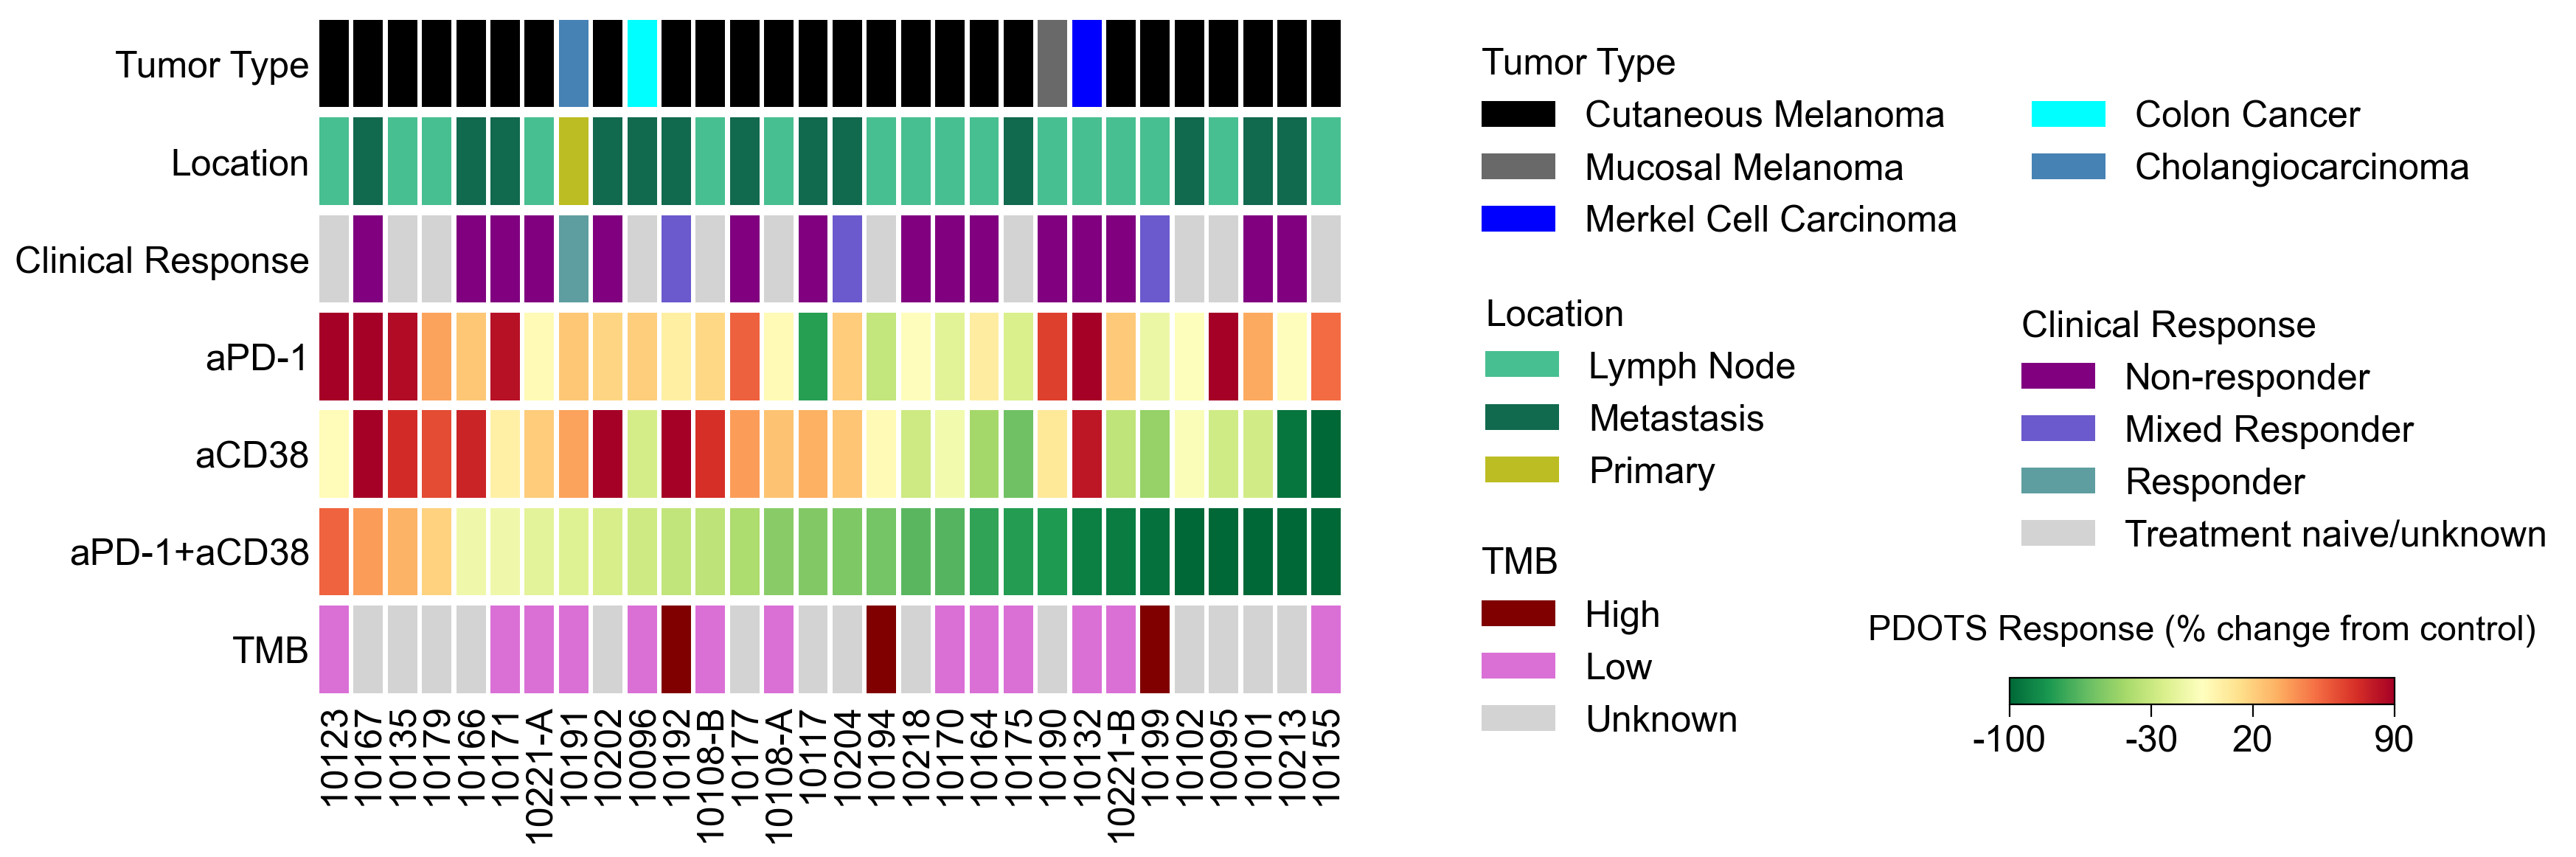

In [157]:
#PLOT
structure_rev = [['TMB'],['aPD-1+aCD38'],['aCD38'],['aPD-1'],['Clinical Response'], ['Location'],['Tumor Type']]

Small_Con_Rev.plot_comut(figsize = (9, 6), x_padding = 0.07, y_padding = 0.03, hspace = 0.02, structure = structure_rev)

#DETAILED LEGEND

#Edit legend order
tumor_order = ['Cutaneous Melanoma', 'Mucosal Melanoma',
               'Merkel Cell Carcinoma','Colon Cancer','Cholangiocarcinoma']
clinical_order = ['Non-responder','Mixed Responder','Responder', 'Treatment naive/Unknown']
TMB_order = ['High', 'Low', 'Unknown']

#Build legend
tumor_leg = Small_Con_Rev.add_axis_legend(name = 'Tumor Type', bbox_to_anchor = (1.1, 1), 
                                          title = 'Tumor Type', order = tumor_order, ncol = 2)
location_leg = Small_Con_Rev.add_axis_legend(name = 'Location', bbox_to_anchor = (1.47, -0.6), 
                                        title = 'Location', ncol = 1)
clinical_leg = Small_Con_Rev.add_axis_legend(name = 'Clinical Response', bbox_to_anchor = (2.2, 0.30), 
                                        title = 'Clinical Response', order = clinical_order, ncol = 1)
TMB_leg = Small_Con_Rev.add_axis_legend(name = 'TMB', bbox_to_anchor = (1.1, 1.9), 
                                        title = 'TMB', order = TMB_order, ncol = 1)

# color bars must be added manually based on figure coordinates - [left, bottom, width, height]
purity_ax = Small_Con_Rev.figure.add_axes([1.4, 0.1, 0.29, 0.03])

# create range
norm = matplotlib.colors.Normalize(vmin=-100, vmax=90)

# create the colorbar with colormap used
resp_colorbar = Small_Con_Rev.figure.colorbar(matplotlib.cm.ScalarMappable(norm=norm, cmap='RdYlGn_r'),
                                                 cax=purity_ax, orientation='horizontal')

# remove tick marks and move tick labels slightly inwards. Also remove black border
resp_colorbar.ax.tick_params(size=6)
resp_colorbar.set_ticks([-100,-30,20,90])
resp_colorbar.set_ticklabels([-100,-30,20,90])
resp_colorbar.outline.set_visible(True)

# set title of colorbar to line up with other legend elements
resp_colorbar.set_label('PDOTS Response (% change from control)', labelpad = -70, x = 0.5, fontsize = 17)
